# Q1.1 Construct a my_knn class

In [ ]:
from tqdm import tqdm_notebook
from scipy.spatial import distance
from operator import itemgetter
import numpy as np

class myknn_regressor:

    def __init__(self, k=3,mode= "equal-weight"):
        """
        myknn constructor
        
        param k: total of neighbors, default 3
        mode : default "equal-weight", compute average y based on k nearest neighbors
        "remove_outliers", remove all the outliers before computing average y on the k nearest neighbors
        
        """
        self.k = int(k)
        self._fit_data = []
        self.mode = mode
        if((k<10) & (self.mode == "remove_outliers")):
            print("Not enabling remove-outliers if k<10, enforcing the mode to be 'equal-weight' " )
            self.mode = "equal-weight"
        
    def fit(self, x, y):
        """
        train knn model with x
        param x: 
        independent variables of data
            
        param y:
        label of data
            
        """
        
        assert len(x) == len(y)
        
        
        self._fit_data = [(coordinates, label) for coordinates, label in zip(x, y)]        
        
        
        
    def outlier_treatment(self,datacolumn):
        """
        helper function for detecting outliers in predict function
        
        param datacolumn: the data which we want to detect outlier
        """
        sorted(datacolumn)
        Q1,Q3 = np.percentile(datacolumn , [25,75])
        IQR = Q3 - Q1
        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        return lower_range,upper_range   
        
        
    def predict(self, x):
        """
        predict an array x based on fitted data
        
        param x : an array of test set's xs
        """

        predicts = []
        for coordinates in tqdm_notebook(x):
            predict_point = coordinates

            # euclidean distance from predict_point to all in self._fit_data
            distances = np.empty([0, 2])
            for data_point, data_label in self._fit_data:
                # compute euclidean distance of predict and data xs and then append into distances
                #  distances.append((distance.euclidean(predict_point, data_point),data_label))
                distances = np.append(distances,[[distance.euclidean(predict_point, data_point),data_label]], axis=0)
                    
            # remove outlier case
            if(self.mode == "remove_outliers"):
                lower_range,upper_range = self.outlier_treatment( distances[:,1] )
                distances = np.asarray([i for i in distances if lower_range <= i[1] <= upper_range])
                
            # get k points with least distances
            distances = np.asarray(sorted(distances, key=itemgetter(0))[:self.k])
            # computing average of k nearest neighbors y
            average_y = np.average(distances[:,1])
            predicts.append(average_y)
        return predicts        
        
        

# Examples for debugging

In [2]:
# # my example test set for debugging
# X_train = [[5,50],[10,100],[15,150],[20,200],[25,250],[30,300],[35,350],[40,450]]
# Y_train = [1,2,3,4,5,6,7,8]
# X_test = [[12,120]]
# #Y_test should be (1+2+3+4+5)/5 = 3 if k = 5


In [3]:
# myknn = myknn_regressor(5,"remove_outliers")
# myknn.fit(X_train, Y_train)
# ypred = myknn.predict(X_test)

In [4]:
# ypred

In [5]:
# #outlier case
# # my example test set for debugging
# X_train = [[1,10],[5,50],[10,100],[15,150],[20,200],[25,250],[30,300],[35,350],[40,450]]
# Y_train = [-999,1,2,3,4,5,6,7,8]
# X_test = [[12,120]]
# #Y_test should be (1+2+3+4+5+6+7+8)/8 = 4.5 if k = 20


In [6]:
# myknn = myknn_regressor(20, mode = "remove_outliers")
# myknn.fit(X_train, Y_train)
# ypred = myknn.predict(X_test)

In [7]:
# ypred

# Q1.2 Uses homework's dataset to predict

In [8]:
import pickle

In [9]:
with open('msd_data1.pickle', 'rb') as file:
    a_dict1 =pickle.load(file)

print(a_dict1)

{'X_train': array([[  53.39967,   56.67781,   55.63508, ...,    1.3159 ,    2.37448,
           1.85999],
       [  42.83464,  -33.90478,   38.97704, ...,    9.72827, -175.51446,
         -15.8389 ],
       [  49.88591,   23.30563,   54.79012, ...,    1.94152,  101.27241,
           8.99355],
       ...,
       [  41.04397,  -96.30727,   56.8073 , ...,    3.60251,  -97.24809,
          -5.80797],
       [  42.8676 ,   43.36365,   29.17957, ...,   18.71014,  208.9029 ,
         -11.08426],
       [  36.57558,   29.8733 ,   -3.08101, ...,   21.0417 ,  106.60317,
           3.44396]]), 'Y_train': array([1996., 2001., 2003., ..., 2009., 1982., 1981.]), 'X_test': array([[  38.51784,   55.38723,   10.31652, ...,    6.66624,  -73.75585,
           9.47857],
       [  44.7309 ,   46.25776,    8.55636, ...,    4.5564 ,   53.49956,
           5.39116],
       [  43.08912,   45.70197,   17.18467, ...,  -13.64909,   -7.42137,
          -4.97266],
       ...,
       [  39.81814,   62.12221,    6.60

In [10]:
from sklearn import preprocessing

In [11]:
X_train = preprocessing.scale(a_dict1['X_train'])

In [12]:
Y_train = a_dict1['Y_train']

In [13]:
X_test = preprocessing.scale(a_dict1['X_test'])

In [14]:
Y_test = a_dict1['Y_test']

# k = 20, mode = equal-weight

In [15]:
myknn = myknn_regressor(20)
myknn.fit(X_train, Y_train)

In [16]:
ypred = myknn.predict(X_test)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [17]:
ypred[:20]

[1992.9,
 1994.05,
 2000.05,
 1991.5,
 1992.8,
 1998.5,
 1987.1,
 1990.9,
 2001.8,
 2003.0,
 2001.15,
 1998.65,
 1995.55,
 1997.2,
 1995.05,
 1997.35,
 1992.15,
 1999.1,
 2003.6,
 1995.75]

In [18]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [19]:
rmse_val = rmse(ypred[0:20], Y_test[0:20])

In [20]:
rmse_val

7.041599605203353

# Q1.3 mode = remove-outlier

In [21]:
myknn = myknn_regressor(20,mode = "remove_outliers")
myknn.fit(X_train, Y_train)
ypred_without_outliers = myknn.predict(X_test)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [23]:
rmse_val_without_outliers = rmse(ypred_without_outliers[0:20], Y_test[0:20])

In [24]:
rmse_val_without_outliers

5.433277095823453

# Q2 Hyperparameter Tuning

In [25]:
# first case sklearn knn with feature standardized
from sklearn.neighbors import KNeighborsRegressor
first_case_rmse = []
for k in tqdm_notebook([1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, Y_train) 
    ypred = neigh.predict(X_test)
    first_case_rmse.append(rmse(ypred[0:20], Y_test[0:20]))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
#third case myknn
third_case_rmse = []
for k in tqdm_notebook([1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]):
    myknn = myknn_regressor(k,mode = "remove_outliers")
    myknn.fit(X_train, Y_train)
    ypred_without_outliers = myknn.predict(X_test)
    third_case_rmse.append(rmse(ypred_without_outliers[0:20], Y_test[0:20]))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


Not enabling remove-outliers if k<10, enforcing the mode to be 'equal-weight' 


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Not enabling remove-outliers if k<10, enforcing the mode to be 'equal-weight' 



Not enabling remove-outliers if k<10, enforcing the mode to be 'equal-weight' 



Not enabling remove-outliers if k<10, enforcing the mode to be 'equal-weight' 



Not enabling remove-outliers if k<10, enforcing the mode to be 'equal-weight' 


In [ ]:
# second case sklearn without feature standardized

In [32]:
X_train_two = a_dict1['X_train']
X_test_two = a_dict1['X_test']

In [33]:
second_case_rmse = []
for k in tqdm_notebook([1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]):
    neigh_two = KNeighborsRegressor(n_neighbors=k)
    neigh_two.fit(X_train_two, Y_train) 
    ypred = neigh_two.predict(X_test_two)
    second_case_rmse.append(rmse(ypred[0:20], Y_test[0:20]))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


# plot a curve that shows the relations between  k  (x-axis) and RMSE (y-axis)

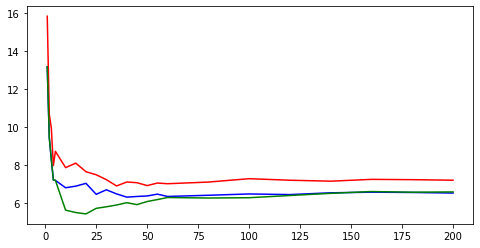

In [44]:
import matplotlib.pyplot as plt
x_axis = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
plt.figure(figsize=(8,4))
plt.plot(x_axis,first_case_rmse,label="first case",color="blue")
plt.plot(x_axis,second_case_rmse,label="second case",color="red")
plt.plot(x_axis,third_case_rmse,label="third case",color="green")

# It seems like the removing the outlier first greatly improves the model(green line), and around k = 20 is the best hyperparameter.